# Analyze the runtime

In the previous notebook, we looked onto the mean of runtime and solution quality.
In this notebook, we look deeper into the runtime over instance size for the different strategies.

In [14]:
# import and setup seaborn
import seaborn as sns
import matplotlib.pyplot as plt  # seaborn works on matplotlib

sns.set_theme()  # making the plot pretty by default

# import size parameters for plots to look good in your paper
from _utils import PLOT_DOC_FULL_WIDTH, PLOT_DOC_HALF_WIDTH

## Quickly load the data

In [15]:
import pandas as pd
results = pd.read_json("./06_simplified_results.json.zip")
# derived values for analyzis
best_coloring = results.groupby("instance")[["colors"]].min()
results = pd.merge(left=results, right=best_coloring, on="instance", suffixes=("", "_best"))
results["above_best (%)"] = (results["colors"] / results["colors_best"] - 1) * 100

## First look onto the data

You usually create too much data (because you only know afterwards what is interesting).
If you just plot everything, you don't see much.
It is still useful to do so, just to take a peek.

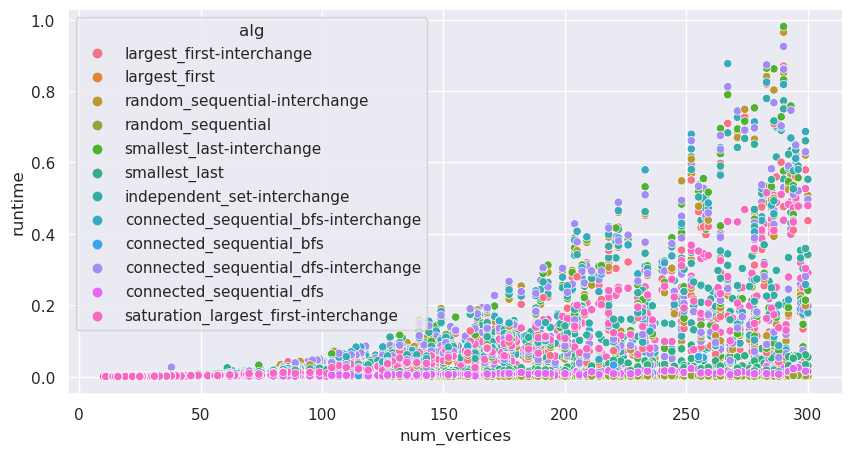

In [16]:
# name the alg for the legend.
results["alg"] = results.apply((lambda row: row['strategy']+("-interchange" if row['interchange'] else "")), axis=1)
# plot the data
plt.figure(figsize = (PLOT_DOC_FULL_WIDTH, 0.5*PLOT_DOC_FULL_WIDTH))
sns.scatterplot(data=results, # the data to plot
                 x="num_vertices",  # the number of vertices on the x-axis
                   y="runtime",  # the runtime on the y-axis
                     hue="alg",  # Every algorithm in a different color
                     ) 
plt.show()

## Look on selection

As there are too many strategies to compare, let us look only on the best five.

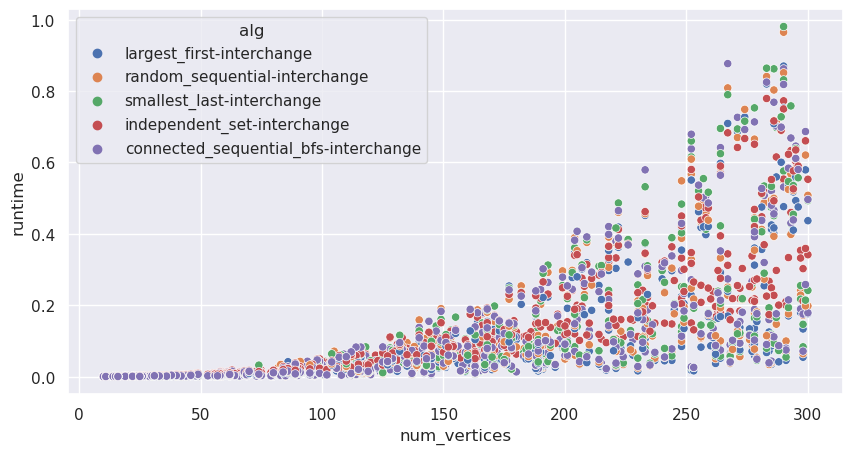

In [17]:
t = results
best_five = t.nsmallest(5, columns="above_best (%)")["alg"].to_list()
plt.figure(figsize = (PLOT_DOC_FULL_WIDTH, 0.5*PLOT_DOC_FULL_WIDTH))
sns.scatterplot(t[t["alg"].isin(best_five)], x="num_vertices", y="runtime", hue="alg")
plt.show()

## Aggregate

There is too much variation to see much, so let us aggregate the data to a lineplot to see how the runtime changes over instance size.
Unfortunately, only identical x-values get aggregated such that we usually still don't see much.

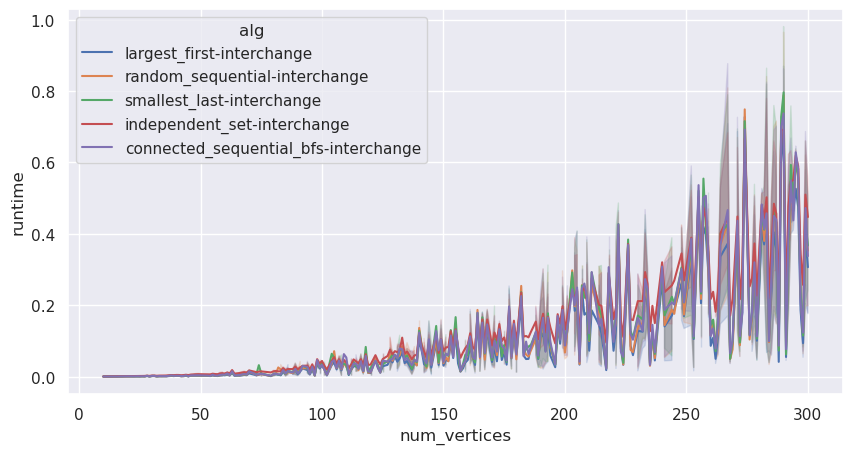

In [18]:
plt.figure(figsize = (PLOT_DOC_FULL_WIDTH, 0.5*PLOT_DOC_FULL_WIDTH))
sns.lineplot(t[t["alg"].isin(best_five)], x="num_vertices", y="runtime", hue="alg")
plt.show()

## Better aggregation

A simple trick is to just round all the x-values to some good intervals.
You could also do a rolling window approach to get even smoother data, but this is more difficult to implement correctly.
In this case, there are multiple value for an interval of size 10, so let us just round to the next 10.

Now we can actually distinguish the curves and see that the runtime is very similar for every strategy, only the having a relative difference.

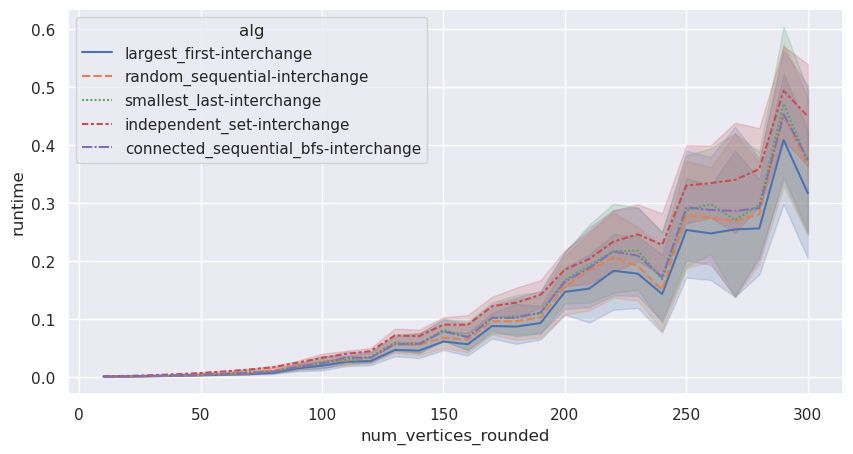

In [19]:
plt.figure(figsize = (PLOT_DOC_FULL_WIDTH, 0.5*PLOT_DOC_FULL_WIDTH))
t["num_vertices_rounded"] = t["num_vertices"].apply(lambda x: (10*round(x/10)))
sns.lineplot(t[t["alg"].isin(best_five)], x="num_vertices_rounded", y="runtime", hue="alg", style="alg")
plt.show()

## Looking onto other parameters

Maybe it is not just the number of vertices, but also the number of edges or the density that is important.

Just using the number of edges doesn't give much more insight, but differentiating over the density does.

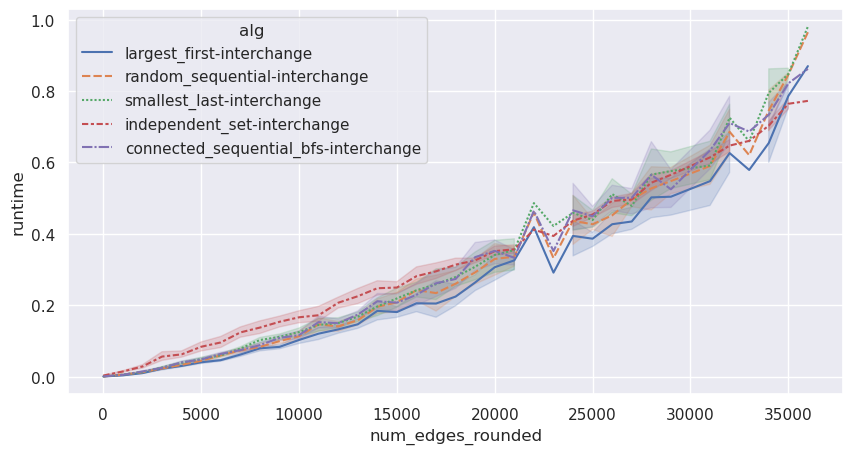

In [23]:
plt.figure(figsize = (PLOT_DOC_FULL_WIDTH, 0.5*PLOT_DOC_FULL_WIDTH))
t["num_edges_rounded"] = t["num_edges"].apply(lambda x: (1000*round(x/1000)))
sns.lineplot(t[t["alg"].isin(best_five)], x="num_edges_rounded", y="runtime", hue="alg", style="alg")
plt.show()

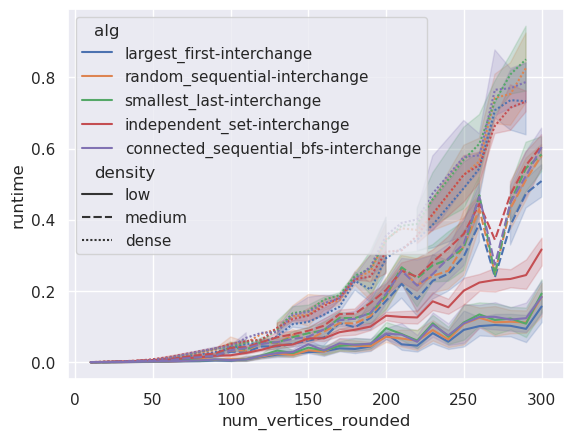

In [24]:
def edge_density(num_vertices, num_edges):
    max_edges = (num_vertices*(num_vertices-1))/2
    density = num_edges/max_edges
    if density>0.8:
        return "dense"
    if density>0.5:
        return "medium"
    return "low"
t["density"] = t.apply((lambda row: edge_density(row["num_vertices"], row["num_edges"])), axis=1)
sns.lineplot(t[t["alg"].isin(best_five)], x="num_vertices_rounded", y="runtime", hue="alg", style="density")
plt.show()